In [1]:
from glob import glob
import sys

sys.path.append('../')
from source_names_dict import source_names_dict, source_names_readable
from get_closest_srcreg import read_region_file

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec

from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS
from astropy.io import fits
from astroquery.simbad import Simbad
import astropy.units as u
from get_all_region_files import get_all_regions
from astropy.nddata import Cutout2D
from astropy.nddata.utils import NoOverlapError
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [7]:
def plot_finding_chart(simbad_name, local_name, xrt_img_path, uvot_img_path):
    
    # Get readable name
    readable_name = source_names_readable[simbad_name]
    
    # Get source position from simbad
    s = Simbad()
    source = s.query_object(simbad_name)
    sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))

    hdul = fits.open(xrt_img_path)
    hdul_uv = fits.open(uvot_img_path)

    xrt_threshold = 10
    cutout_size   = 50

    img_data = hdul[0].data
    # mask the XRT array to get rid of background
    sources = np.ma.masked_where(img_data < xrt_threshold, img_data)


    # Create UV cutout region around source
    xpos_xrt, ypos_xrt = skycoord_to_pixel(sc, WCS(hdul[0].header))
    xpos, ypos = skycoord_to_pixel(sc, WCS(hdul_uv[1].header))
    pos  = (xpos[0], ypos[0])
    cutout = Cutout2D(hdul_uv[1].data, pos, cutout_size, wcs=WCS(hdul_uv[1].header)) # 50 pixel square

    title = f'{simbad_name} | {local_name} | {readable_name} \n RA={str(sc.ra[0])} DEC={str(sc.dec[0])} \n{uvot_img_path}'
    
    # Plotting
    fig = plt.figure(figsize=(10, 10))
    plt.suptitle(title)
    ax = plt.subplot(projection=WCS(hdul[0].header))
    ax.imshow(hdul_uv[1].data, norm=LogNorm(10), cmap='hot', transform=ax.get_transform(WCS(hdul_uv[1].header)), origin='lower', interpolation='none')
    ax.imshow(sources, norm=LogNorm(10), cmap='winter', interpolation='none', origin='lower')

    cutout.plot_on_original(color='white', transform=ax.get_transform(WCS(hdul_uv[1].header)))
    ax.axvline(xpos_xrt, lw=1.0, color='cyan')
    ax.axhline(ypos_xrt, lw=1.0, color='cyan')
    ax.annotate(xy=(xpos_xrt+15,ypos_xrt+5), text=readable_name, color='cyan')

    # Zoom in a bit
    extent = 200 # Extent in pixels
    ax.set_xlim(xpos_xrt-extent, xpos_xrt+extent)
    ax.set_ylim(ypos_xrt-extent, ypos_xrt+extent)
    


    ax.set_xlabel('RA (h:m:s)')
    ax.set_ylabel('DEC (d:m:s)')

    # Plot the inset
    left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height], projection=cutout.wcs)
    ax2.imshow(cutout.data, origin='lower', aspect='equal', norm=LogNorm(), interpolation='none', cmap='hot')

    xpos, ypos = skycoord_to_pixel(sc, cutout.wcs)
    
    # Plot crosshair
    ax2.axvline(xpos, color='cyan', lw=1.0)
    ax2.axhline(ypos, color='cyan', lw=1.0, label='simbad_position')
    ax2.set_xlabel(' ')
    ax2.set_ylabel(' ')
    ax2.tick_params(axis='both', colors='white')
    
    plt.savefig(f'../figures/finding_plots/{simbad_name}_{uvot_img_path.split("/")[-1][:-4]}.png')
    plt.savefig(f'../figures/finding_plots/{simbad_name}_{uvot_img_path.split("/")[-1][:-4]}.pdf')
    
    plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.156991 from DATE-OBS.
Set MJD-END to 56252.158113 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.156991 from DATE-OBS.
Set MJD-END to 56252.158113 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.156991 from DATE-OBS.
Set MJD-END to 56252.158113 from DATE-END'. [astropy.wcs.wcs]


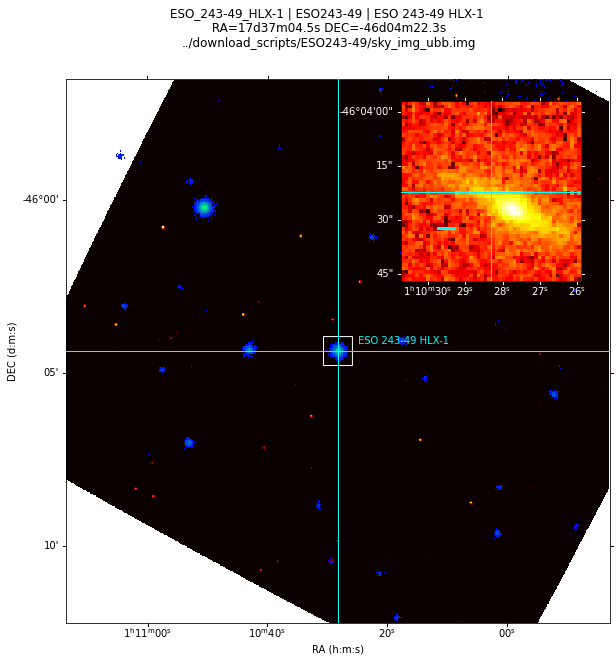

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.115706 from DATE-OBS.
Set MJD-END to 59116.640926 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.115706 from DATE-OBS.
Set MJD-END to 59116.640926 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.115706 from DATE-OBS.
Set MJD-END to 59116.640926 from DATE-END'. [astropy.wcs.wcs]


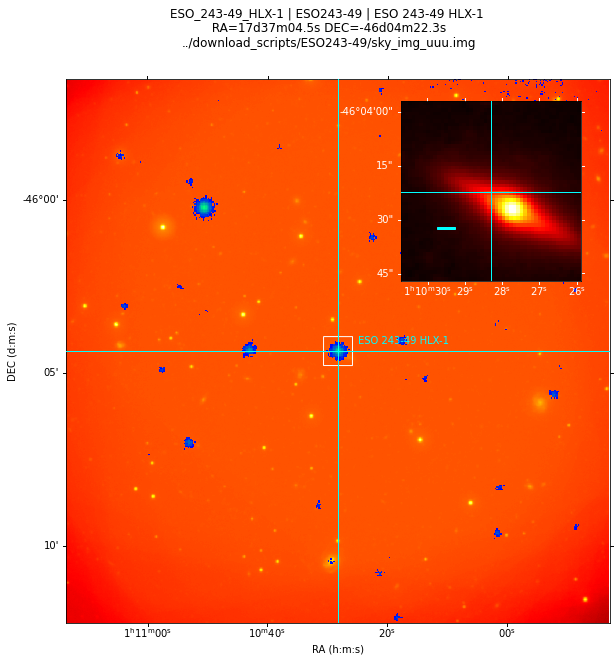

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.162755 from DATE-OBS.
Set MJD-END to 56252.163866 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.162755 from DATE-OBS.
Set MJD-END to 56252.163866 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56252.162755 from DATE-OBS.
Set MJD-END to 56252.163866 from DATE-END'. [astropy.wcs.wcs]


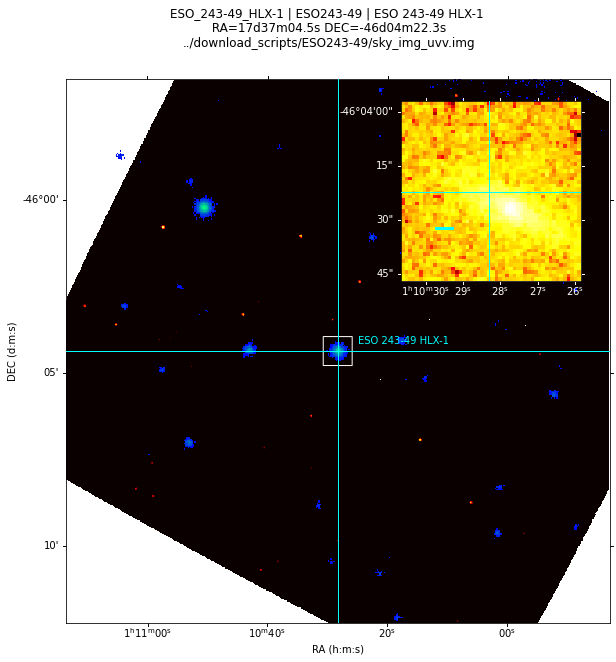

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.114329 from DATE-OBS.
Set MJD-END to 59103.807581 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.114329 from DATE-OBS.
Set MJD-END to 59103.807581 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 59478.411019 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54763.114329 from DATE-OBS.
Set MJD-END to 59103.807581 from DATE-END'. [astropy.wcs.wcs]


In [ ]:
simbad_name = 'NAME_NGC_1313_X-1'
local_name =  'NGC1313'

for simbad_name, local_name in source_names_dict.items():
    xrt_img_path = f'../download_scripts/{local_name}/xrt_stack.img'
    uvot_imgs = glob(f'../download_scripts/{local_name}/*sky*img')
    for uvot_img_path in uvot_imgs:
        try:
            plot_finding_chart(simbad_name, local_name, xrt_img_path, uvot_img_path)
        except Exception as e:
            print(f'Could not plot {simbad_name} {local_name} {xrt_img_path} {uvot_img_path}')
            print(e)
    #break

In [4]:
xpos

NameError: name 'xpos' is not defined

In [ ]:
simbad_name = 'NAME_NGC_1313_X-1'
local_name =  'NGC1313'
xrt_img_path = f'../download_scripts/{local_name}/xrt_stack.img'
uvot_img_path = f'../download_scripts/{local_name}/sky_img_uuu.img'


# Get source position from simbad
s = Simbad()
source = s.query_object(simbad_name)
sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))

hdul = fits.open(xrt_img_path)
hdul_uv = fits.open(uvot_img_path)

xrt_threshold = 10
cutout_size   = 50

img_data = hdul[0].data
# mask the XRT array to get rid of background
sources = np.ma.masked_where(img_data < xrt_threshold, img_data)


# Create UV cutout region around source
xpos_xrt, ypos_xrt = skycoord_to_pixel(sc, WCS(hdul[0].header))
xpos, ypos = skycoord_to_pixel(sc, WCS(hdul_uv[1].header))
pos  = (xpos[0], ypos[0])
cutout = Cutout2D(hdul_uv[1].data, pos, cutout_size, wcs=WCS(hdul_uv[1].header)) # 50 pixel square

title = f'{simbad_name} | {local_name} \n RA={str(sc.ra[0])} DEC={str(sc.dec[0])} \n{uvot_img_path}'
# Plotting
fig = plt.figure(figsize=(10, 10))
plt.suptitle(title)
ax = plt.subplot(projection=WCS(hdul[0].header))
ax.imshow(hdul_uv[1].data, norm=LogNorm(10), cmap='hot', transform=ax.get_transform(WCS(hdul_uv[1].header)), origin='lower', interpolation='none')
ax.imshow(sources, norm=LogNorm(10), cmap='winter', interpolation='none', origin='lower')

cutout.plot_on_original(color='white', transform=ax.get_transform(WCS(hdul_uv[1].header)))
ax.axvline(xpos_xrt, lw=1.0, color='cyan')
ax.axhline(ypos_xrt, lw=1.0, color='cyan')
ax.annotate(xy=(xpos_xrt+15,ypos_xrt+5), text=simbad_name, color='cyan')

# Zoom in a bit
extent = 200 # Extent in pixels
ax.set_xlim(xpos_xrt-extent, xpos_xrt+extent)
ax.set_ylim(ypos_xrt-extent, ypos_xrt+extent)

ax.set_xlabel('RA (h:m:s)')
ax.set_ylabel('DEC (d:m:s)')

# Plot the inset
left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height], projection=cutout.wcs)
ax2.imshow(cutout.data, origin='lower', aspect='equal', norm=LogNorm(), interpolation='none', cmap='hot')


xpos, ypos = skycoord_to_pixel(sc, cutout.wcs)
ax2.axvline(xpos, color='cyan', lw=1.0)
ax2.axhline(ypos, color='cyan', lw=1.0, label='simbad_position')
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')


In [ ]:
# Plot all UVOT cutout regions together
simbad_name = 'NAME_NGC_1313_X-2'

for simbad_name, local_name in source_names_dict.items():
    fig_width = 5
    fig_height = 5
    cutout_size   = 50
    cmap = 'hot'
    textcolor = 'white'

    plt.rcParams.update({'font.size': 8})

    # Get readable name
    readable_name = source_names_readable[simbad_name]
    #local_name    = source_names_dict[simbad_name]
    uvot_imgs = glob(f'../download_scripts/{local_name}/*sky*img')

    uvot_img_path = uvot_imgs[0]

    # Get source position from simbad
    s = Simbad()
    source = s.query_object(simbad_name)
    sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))

    uvot_imgs = glob(f'../download_scripts/{local_name}/*sky*img')
    n_imgs = len(uvot_imgs)
    fig = plt.figure(figsize=(fig_height*n_imgs,fig_height))

    for i, uvot_img_path in enumerate(uvot_imgs):
        # Load UV image
        hdul_uv = fits.open(uvot_img_path)
        wcs_uv = WCS(hdul_uv[1].header)
        xpos, ypos = skycoord_to_pixel(sc, wcs_uv)
        print(xpos, ypos)
        pos  = (xpos[0], ypos[0])
        cutout = Cutout2D(hdul_uv[1].data, pos, cutout_size, wcs=wcs_uv) # 50 pixel square
        xpos_cut, ypos_cut = skycoord_to_pixel(sc, cutout.wcs)

        # Count number of images that were stacked
        nstack = 0
        for row in hdul_uv[0].header['HISTORY']:
            if 'img.gz' in row:
                nstack+=1

        uvot_filter = uvot_img_path.split('/')[-1].split('.')[0].split('_')[-1].upper()
        iii = int(f'1{n_imgs}{i+1}') # Gridspec pos
        ax = plt.subplot(iii, projection=WCS(hdul_uv[1].header))

        ax.imshow(cutout.data,  cmap=cmap, origin='lower', interpolation='none')
        ax.axvline(xpos_cut, lw=1.0, color=textcolor)
        ax.axhline(ypos_cut, lw=1.0, color=textcolor)
        ax.annotate(xy=(xpos_cut-24,ypos_cut+20), text=readable_name, color=textcolor)
        ax.annotate(xy=(xpos_cut-24,ypos_cut+16.5), text=f'FILTER : {uvot_filter}', color=textcolor)
        ax.annotate(xy=(xpos_cut-24,ypos_cut+13), text=f'NSTACK : {nstack}', color=textcolor)

        ax.coords[1].set_ticklabel_visible(False)
        ax.set_xlabel('RA (h:m:s)')
        ax.set_ylabel(' ') 
        fig.add_subplot(ax)

    fig.get_axes()[0].coords[1].set_ticklabel_visible(True)
    fig.get_axes()[0].set_ylabel('DEC (d:m:s)')
    plt.subplots_adjust(wspace=0.01)
    #plt.tight_layout()
    plt.savefig(f'../figures/uvot_zooms/png/{readable_name}.png', bbox_inches='tight', facecolor='white')
    plt.savefig(f'../figures/uvot_zooms/pdf/{readable_name}.pdf', bbox_inches='tight', facecolor='white')
    plt.show()

In [ ]:
import astropy.units as u

In [ ]:
d = 4.6 * u.Mpc
arcsec = 1 * u.arcsec
x = d * np.tan(arcsec.to('rad'))
x_pc = x.to('pc')

In [ ]:
np.sin(np.pi/2)

In [ ]:
fig, ax = plt.subplots()
ax.plot([1,2,3,43,45,])
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
ae = AnchoredSizeBar(ax.transData, 0.5, r"1 pc", loc='lower right', pad=0.1, borderpad=0.5, sep=5, frameon=False)
ax.add_artist(ae)

In [ ]:
simbad_name = 'NAME_NGC_1313_X-1'
local_name =  'NGC1313'
xrt_img_path = f'../download_scripts/{local_name}/xrt_stack.img'
uvot_img_path = f'../download_scripts/{local_name}/sky_img_uuu.img'


# Get source position from simbad
s = Simbad()
source = s.query_object(simbad_name)
sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))

hdul = fits.open(xrt_img_path)
img_data = hdul[0].data

ax = plt.subplot(projection=WCS(hdul[0].header))
ax.imshow(img_data, norm=LogNorm(10), cmap='hot', origin='lower', interpolation='none')

ae = AnchoredSizeBar(ax.transData, 100, r"1 pc", loc='lower right', pad=0.1, borderpad=0.5, sep=5, frameon=False)
ax.add_artist(ae)

In [ ]:
xpos1, ypos1 = skycoord_to_pixel(sc, WCS(hdul[0].header))
print(xpos1, ypos1)
sc2 = SkyCoord(ra=sc.ra+1*u.arcsec, dec=sc.dec)
xpos2, ypos2 = skycoord_to_pixel(sc2, WCS(hdul[0].header))
print(xpos2, ypos2)

dist = np.sqrt((xpos2-xpos1)**2 + (ypos1-ypos2)**2)
print(dist)



In [ ]:
sc

In [ ]:
sc2

In [ ]:
uvot_imgs

In [ ]:
uvot_filter = 'UVV'
for img in uvot_imgs:
    img = img.upper()
    if uvot_filter in img:
        print(img)

In [ ]:
def plot_uvot_inset(simbad_name, uvot_filter, ax):
    pass

simbad_name = 'NAME_NGC_1313_X-1'
readable_name = source_names_readable[simbad_name]
local_name    = source_names_dict[simbad_name]

# Get source position from simbad
s = Simbad()
source = s.query_object(simbad_name)
sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))


# Get uvot image
uvot_imgs = glob(f'../download_scripts/{local_name}/*sky*img')
print(f'{simbad_name} {readable_name} {local_name} Found {len(uvot_imgs)} uvot images')

uvot_img_path = uvot_imgs[0]
print(f'Opening image: {uvot_img_path}')
hdul_uv = fits.open(uvot_img_path)

cutout_size   = 50

# Create UV cutout region around source
xpos, ypos = skycoord_to_pixel(sc, WCS(hdul_uv[1].header))
pos  = (xpos[0], ypos[0])
cutout = Cutout2D(hdul_uv[1].data, pos, cutout_size, wcs=WCS(hdul_uv[1].header)) # 50 pixel square

title = f'{simbad_name} | {local_name} | {readable_name} \n RA={str(sc.ra[0])} DEC={str(sc.dec[0])} \n{uvot_img_path}'

xpos_cut, ypos_cut = skycoord_to_pixel(sc, cutout.wcs)

ax = plt.subplot(projection=cutout.wcs)
ax.imshow(cutout.data)

ax.scatter(xpos_cut, ypos_cut, marker='x', color='red', label=f'{readable_name}')
ax.legend()
ax.set_xlabel(' ')
ax.set_ylabel(' ')
plt.show()



"""
# Plotting
fig = plt.figure(figsize=(10, 10))
plt.suptitle(title)
ax = plt.subplot(projection=WCS(hdul[0].header))
ax.imshow(hdul_uv[1].data, norm=LogNorm(10), cmap='hot', transform=ax.get_transform(WCS(hdul_uv[1].header)), origin='lower', interpolation='none')
ax.imshow(sources, norm=LogNorm(10), cmap='winter', interpolation='none', origin='lower')

cutout.plot_on_original(color='white', transform=ax.get_transform(WCS(hdul_uv[1].header)))
ax.axvline(xpos_xrt, lw=1.0, color='cyan')
ax.axhline(ypos_xrt, lw=1.0, color='cyan')
ax.annotate(xy=(xpos_xrt+15,ypos_xrt+5), text=readable_name, color='cyan')

# Zoom in a bit
extent = 200 # Extent in pixels
ax.set_xlim(xpos_xrt-extent, xpos_xrt+extent)
ax.set_ylim(ypos_xrt-extent, ypos_xrt+extent)

ax.set_xlabel('RA (h:m:s)')
ax.set_ylabel('DEC (d:m:s)')

# Plot the inset
left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height], projection=cutout.wcs)
ax2.imshow(cutout.data, origin='lower', aspect='equal', norm=LogNorm(), interpolation='none', cmap='hot')

xpos, ypos = skycoord_to_pixel(sc, cutout.wcs)
ax2.axvline(xpos, color='cyan', lw=1.0)
ax2.axhline(ypos, color='cyan', lw=1.0, label='simbad_position')
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')
ax2.tick_params(axis='both', colors='white')
plt.savefig(f'../figures/finding_plots/{simbad_name}_{uvot_img_path.split("/")[-1][:-4]}.png')
plt.savefig(f'../figures/finding_plots/{simbad_name}_{uvot_img_path.split("/")[-1][:-4]}.pdf')

plt.show()

fig, ax = plt.subplots(figsize=(6,6))
"""


In [ ]:
skycoord_to_pixel

In [ ]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
def get_stack_counts(uvot_img_paths):
    res = {}
    for img in uvot_img_paths:
        hdul_uv = fits.open(img)
        nstack = 0
        for row in hdul_uv[0].header['HISTORY']:
            if 'img.gz' in row:
                nstack+=1

        res[img] = nstack
    return res

def get_uvot_img_ext(uvot_image_path):
    uvot_img_extensions = ['ubb', 'uuu', 'uvv', 'uw1', 'uw2', 'um2']
    for f in uvot_img_extensions:
        f_str = f'_{f}.'
        if f_str in uvot_image_path:
            return f

In [ ]:
ncols = 5
nrows = 5

w = 8.0
h = w / (ncols / nrows)

fig = plt.figure(figsize=(w,h), facecolor='white')

names = list(source_names_dict.keys())
names = names[24:]
gs = fig.add_gridspec(nrows, ncols)
for i, g in enumerate(gs):
    simbad_name   = names[i]

    readable_name = source_names_readable[simbad_name]
    local_name    = source_names_dict[simbad_name]

    # Get source position from simbad
    s = Simbad()
    source = s.query_object(simbad_name)
    sc = SkyCoord(source['RA'], source['DEC'], unit=(u.hourangle, u.deg))


    # Get uvot image
    uvot_imgs = glob(f'../download_scripts/{local_name}/*sky*img')
    print(f'{simbad_name} {readable_name} {local_name} Found {len(uvot_imgs)} uvot images')

    
    stack_counts = get_stack_counts(uvot_imgs)
    uvot_img_path = max(stack_counts, key=stack_counts.get) # Get deepest image
    nstack = max(stack_counts.values()) # get number of deepest stack
    ext = get_uvot_img_ext(uvot_img_path)
    
    
    print(f'Opening image: {uvot_img_path}')
    hdul_uv = fits.open(uvot_img_path)

    cutout_size   = 50

    # Create UV cutout region around source
    xpos, ypos = skycoord_to_pixel(sc, WCS(hdul_uv[1].header))
    pos  = (xpos[0], ypos[0])
    try:
        cutout = Cutout2D(hdul_uv[1].data, pos, cutout_size, wcs=WCS(hdul_uv[1].header)) # 50 pixel square
    except:
        pass

    xpos_cut, ypos_cut = skycoord_to_pixel(sc, cutout.wcs)

    # Plotting
    ax = fig.add_subplot(g, projection=WCS(hdul_uv[1].header))
    ax.imshow(cutout.data, cmap='binary', interpolation='none')
    ax.axvline(xpos_cut, lw=0.5, color='black', label=f'{readable_name}\n{ext.upper()} {nstack}')
    ax.axhline(ypos_cut, lw=0.5, color='black')
    #ax.scatter(xpos_cut, ypos_cut, marker='x', color='red')


    #plt.show()
    
    #ax.set_xticks([0])
    #ax.set_yticks([0])
    
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    
    ax.legend(prop={'size': 6})
    #ax.coords[0].set_ticklabel(color='black', size=7)
    #ax.coords[1].set_ticklabel(color='black', size=7)
    
    
    ax.coords[0].set_ticks_visible(False)
    ax.coords[1].set_ticks_visible(False)
    ax.coords[0].set_ticklabel_visible(False)
    ax.coords[1].set_ticklabel_visible(False)
    

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('../figures/test_fig.pdf', bbox_inches='tight')
plt.show()

In [ ]:
uvot_img_path = max(stack_counts, key=stack_counts.get) # Get deepest image

In [ ]:
uvot_img_path

In [ ]:
max(stack_counts, key=stack_counts.get)

In [ ]:
from uvot import filters

In [ ]:
filters

In [ ]:

for img in uvot_imgs:

    

In [ ]:
f_str

In [ ]:
ls